In [29]:
import pandas as pd

In [37]:
df = pd.read_csv('DataToBeAnalyzed.csv')

In [38]:
df

,No.,Time,IPSource,IPDestination,Protocol,Length,Info,Sport,Dport
0,1,0.000000,150.242.182.99,125.4.214.20,TCP,1514,"80 > 51552 [PSH, ACK] Seq=1 Ack=1 Win=32851 ...",80.0,51552.0
1,2,0.000001,150.242.182.99,125.4.214.20,TCP,1514,"[TCP Retransmission] 80 > 51552 [PSH, ACK] S...",80.0,51552.0
2,3,0.000002,150.242.182.99,125.4.214.20,TCP,1514,80 > 51552 [ACK] Seq=1449 Ack=1 Win=32851 Le...,80.0,51552.0
3,4,0.000003,150.242.182.99,125.4.214.20,TCP,1514,[TCP Retransmission] 80 > 51552 [ACK] Seq=14...,80.0,51552.0
4,5,0.000004,173.242.96.32,150.242.237.233,UDP,1392,443 > 46017 Len=1350[Packet size limited dur...,443.0,46017.0
...,...,...,...,...,...,...,...,...,...
26114281,26114282,53.609669,172.230.110.34,163.229.43.8,TCP,1484,[TCP Retransmission] 443 > 39248 [ACK] Seq=4...,443.0,39248.0
26114282,26114283,53.609669,150.242.182.99,220.252.173.159,TCP,1468,"80 > 55954 [PSH, ACK] Seq=3110665 Ack=276 Wi...",80.0,55954.0
26114283,26114284,53.609673,172.230.110.34,163.229.43.8,TCP,1484,443 > 39248 [ACK] Seq=4060230 Ack=48848 Win=...,443.0,39248.0
26114284,26114285,53.609673,150.242.182.99,220.252.173.159,TCP,1468,"[TCP Retransmission] 80 > 55954 [PSH, ACK] S...",80.0,55954.0


In [39]:
df.drop(['No.'], axis=1, inplace = True)

In [40]:
df

,Time,IPSource,IPDestination,Protocol,Length,Info,Sport,Dport
0,0.000000,150.242.182.99,125.4.214.20,TCP,1514,"80 > 51552 [PSH, ACK] Seq=1 Ack=1 Win=32851 ...",80.0,51552.0
1,0.000001,150.242.182.99,125.4.214.20,TCP,1514,"[TCP Retransmission] 80 > 51552 [PSH, ACK] S...",80.0,51552.0
2,0.000002,150.242.182.99,125.4.214.20,TCP,1514,80 > 51552 [ACK] Seq=1449 Ack=1 Win=32851 Le...,80.0,51552.0
3,0.000003,150.242.182.99,125.4.214.20,TCP,1514,[TCP Retransmission] 80 > 51552 [ACK] Seq=14...,80.0,51552.0
4,0.000004,173.242.96.32,150.242.237.233,UDP,1392,443 > 46017 Len=1350[Packet size limited dur...,443.0,46017.0
...,...,...,...,...,...,...,...,...
26114281,53.609669,172.230.110.34,163.229.43.8,TCP,1484,[TCP Retransmission] 443 > 39248 [ACK] Seq=4...,443.0,39248.0
26114282,53.609669,150.242.182.99,220.252.173.159,TCP,1468,"80 > 55954 [PSH, ACK] Seq=3110665 Ack=276 Wi...",80.0,55954.0
26114283,53.609673,172.230.110.34,163.229.43.8,TCP,1484,443 > 39248 [ACK] Seq=4060230 Ack=48848 Win=...,443.0,39248.0
26114284,53.609673,150.242.182.99,220.252.173.159,TCP,1468,"[TCP Retransmission] 80 > 55954 [PSH, ACK] S...",80.0,55954.0


In [43]:
df.columns

Index(['Time', 'IPSource', 'IPDestination', 'Protocol', 'Length', 'Info',
       'Sport', 'Dport'],
      dtype='object')

In [45]:
set(df['Protocol'][:])

{'ALLJOYN-NS',
 'ARP',
 'BOOTP',
 'DNS',
 'ECHO',
 'ESP',
 'ETHERIP',
 'ICMP',
 'ICMPv6',
 'ICP',
 'IPv4',
 'IPv6',
 'ISAKMP',
 'KNXnet/IP',
 'LLC',
 'LLMNR',
 'LWAPP',
 'MDNS',
 'MPTCP',
 'NBNS',
 'NTP',
 'NXP 802.15.4 SNIFFER',
 'OpenVPN',
 'PIM',
 'RPC',
 'SRVLOC',
 'TCP',
 'TFTP',
 'TIME',
 'UDP',
 'UDPENCAP',
 'VxLAN'}

In [75]:
PacksPerTime = pd.DataFrame(df.groupby(["IPSource", "IPDestination",'Protocol',
       'Sport', 'Dport' ]).Time.count())

In [85]:
PacksPerTime.head()

,,,,,Time
IPSource,IPDestination,Protocol,Sport,Dport,
1.0.164.124,203.77.136.169,NTP,37526.0,123.0,2
1.0.164.163,203.77.136.169,NTP,44106.0,123.0,2
1.0.164.28,203.77.136.169,NTP,57621.0,123.0,2
1.0.164.57,203.77.136.169,NTP,35376.0,123.0,2
1.0.165.94,203.77.136.169,NTP,43605.0,123.0,2


In [84]:
PacksPerTime.columns

Index(['Time'], dtype='object')

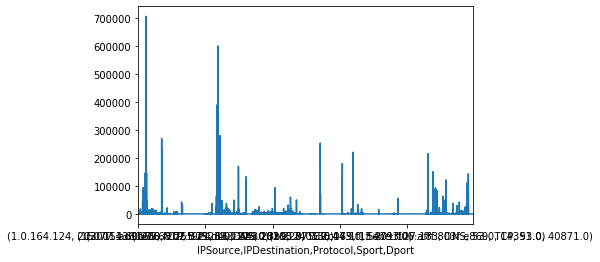

In [90]:
PacksPerTime['Time'].plot()

KeyboardInterrupt: 

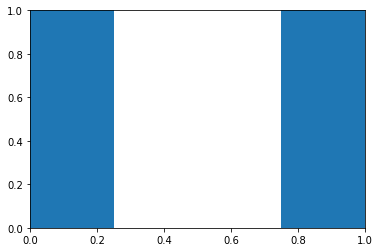

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

# a simple line plot
PacksPerTime.plot(kind='bar',y='Time')

In [74]:
sum(a==2)

120144

In [48]:
a.loc[a['Protocol']=='IPv4'][2]

KeyError: 'Protocol'